# **I. Project Title : Stock Market Analysis Using Python**





---





### **1.1 Abstract of the project:**

*The project "Stock Market Analysis Using Python" is aims to analyze the stocks in stock market analysis. We will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history.*





### **1.2 Case Study**
1.   What was the change in price of the stock overtime?
2.   What was the daily return of the stock on average?
3.   What was the moving average of the various stocks?
4.   List itemWhat was the correlation between different stocks'?
5.   How much value do we put at risk by investing in a particular stock?






### **1.3 Getting the Data**
*The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo.*

----

### **1. What was the change in price of the stock overtime?**

*In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.*

In [1]:
# Installing required Libraries
! pip install pandas
! pip install matplotlib.pyplot
! pip install -q yfinance
! pip install seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [43]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For reading stock data from yahoo
import yfinance as yf
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
# For taking the data through time interval
from datetime import datetime

yf.pdr_override()




In [44]:
# For time stamps
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [45]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [46]:
# Zip the data fro single data set
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
df = pd.concat(company_list, axis=0)

*Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.*

### **Descriptive Statistics about the Data**
`.describe()` *generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.*

In [6]:
# Summary Stats
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,183.596773,185.162231,182.157370,183.679044,183.184495,6.005174e+07
std,10.094772,10.184478,9.980056,10.090309,10.095998,2.468641e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.244995,177.025002,173.660004,175.280006,174.800781,4.670805e+07
50%,183.550003,185.089996,181.919998,183.860001,183.394653,5.337730e+07
75%,190.919998,192.134995,189.700005,191.104996,190.528419,6.599885e+07
max,217.589996,220.199997,213.000000,216.669998,216.669998,2.418051e+08


### Information About the Data
*`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.*

In [7]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-06-23 to 2024-06-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [8]:
# Downloding the stocks dataset in locally
stock_data = {}
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start, end)

# Combine all stock dataframes into a single dataframe
combined_df = pd.concat(stock_data.values(), keys=stock_data.keys())
combined_df.to_csv('combined_stock_data.csv')
print("Combined stock data saved to combined_stock_data.csv")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Combined stock data saved to combined_stock_data.csv


### Closing Price

*The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.*

In [9]:
# Fix the Figure background, style and gride lines
sns.set_style('whitegrid')
plt.style.use("bmh")

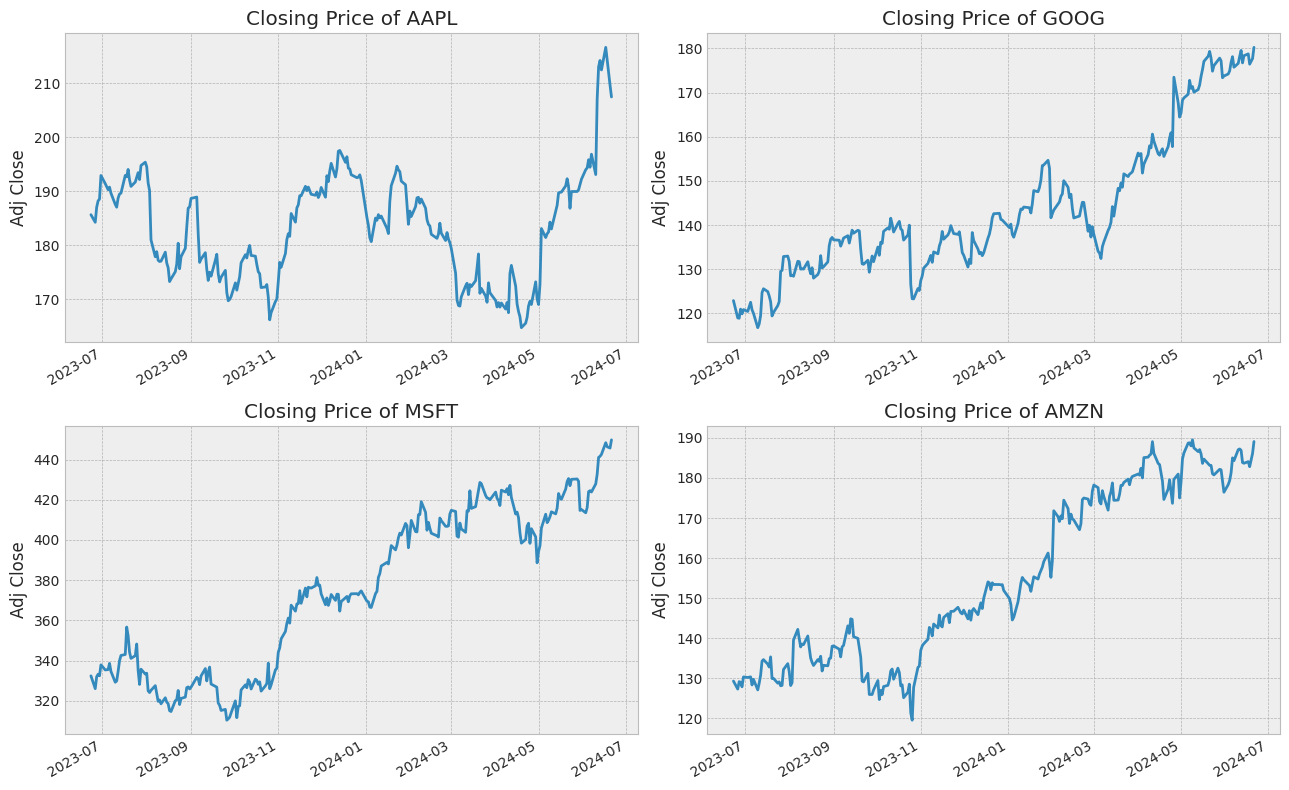

In [11]:
plt.figure(figsize=(13, 8))

# Using gridline from seaborn for graphs
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

### Volume of Sales
*Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.*

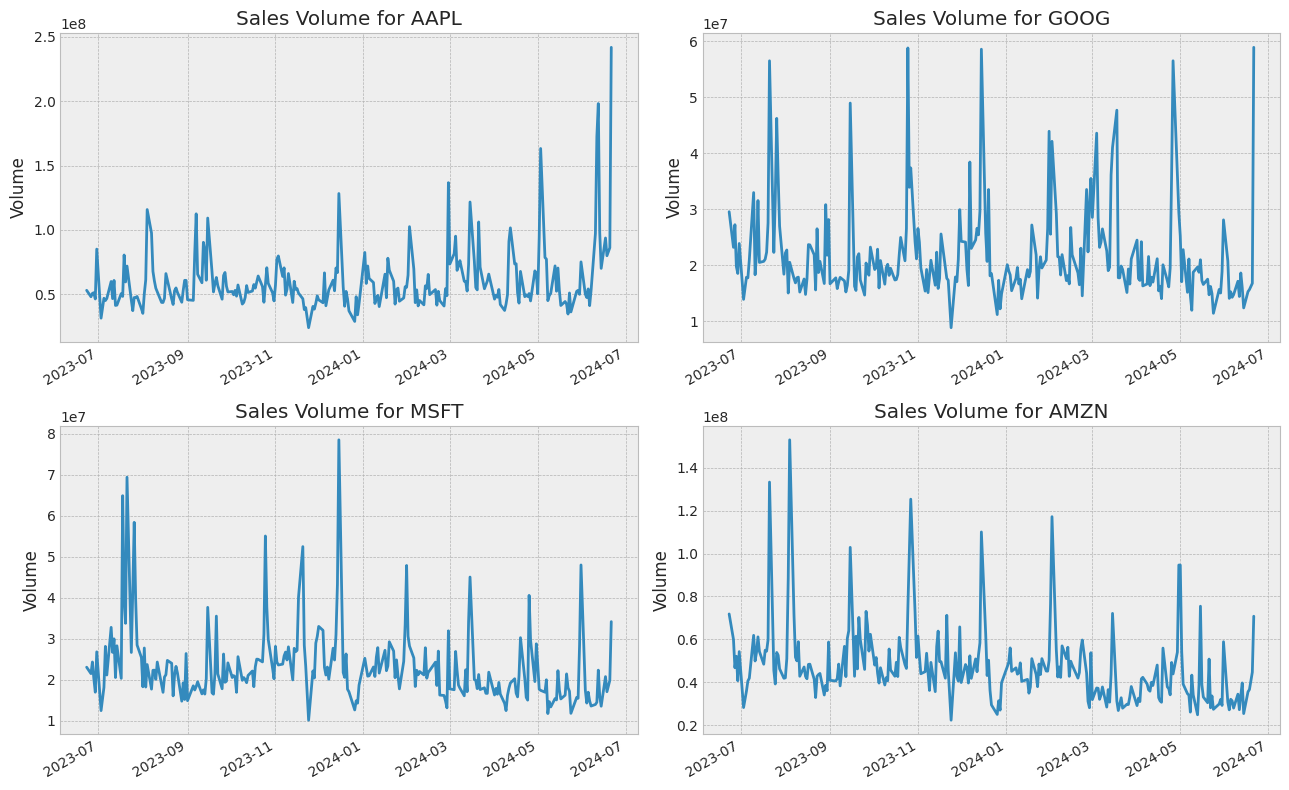

In [16]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(13, 8))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

The closing price and trading volume are fundamental metrics in stock market analysis:

*Closing Price: Used as a standard benchmark for performance evaluation over time. A higher closing price relative to previous periods generally indicates positive performance, while a lower closing price suggests the opposite.*

*Volume of Sales: Reflects market activity and investor sentiment. Higher trading volumes often accompany significant price movements, indicating strong interest or potential shifts in market sentiment.*



---



## 2. What was the moving average of the various stocks?

*The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 days, 30 days, or any time period the trader chooses.*

In [17]:
#Taking some days to check the moving average
ma_day = [10, 20, 50]

In [18]:
#Creating nested loop for search company name and average
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


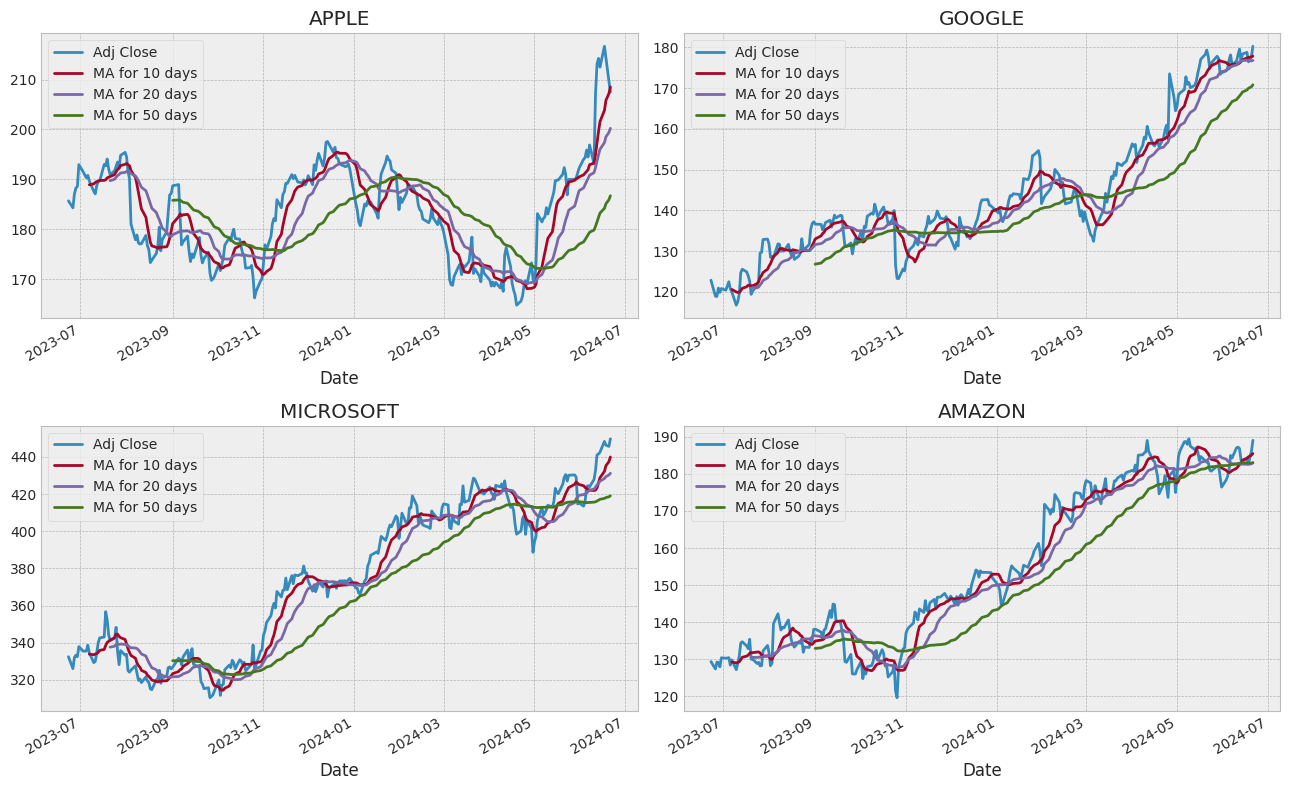

In [21]:
# Set the figer size and subplots for display
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(13)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

*Based on the graphs showing moving averages (MA) for Apple, Google, Microsoft, and Amazon, the 10 and 20-day averages smooth out the ups and downs in stock prices well. They react quickly to recent changes in prices while still showing the overall direction of the stock. Longer averages like the 50-day one move more slowly, so they're better for seeing how the stock has done over a longer time but might miss recent changes. For traders and analysts trying to understand what stocks are doing in the short to medium term, the 10 and 20-day averages are best because they balance quickly reacting to new information with giving a stable view of the trend.*



---



### 3. What was the daily return of the stock on average?

*Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve tech daily returns for the Apple stock.*

In [22]:
# We'll use pct_change  (Current-Previous/Previous) * 100. to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

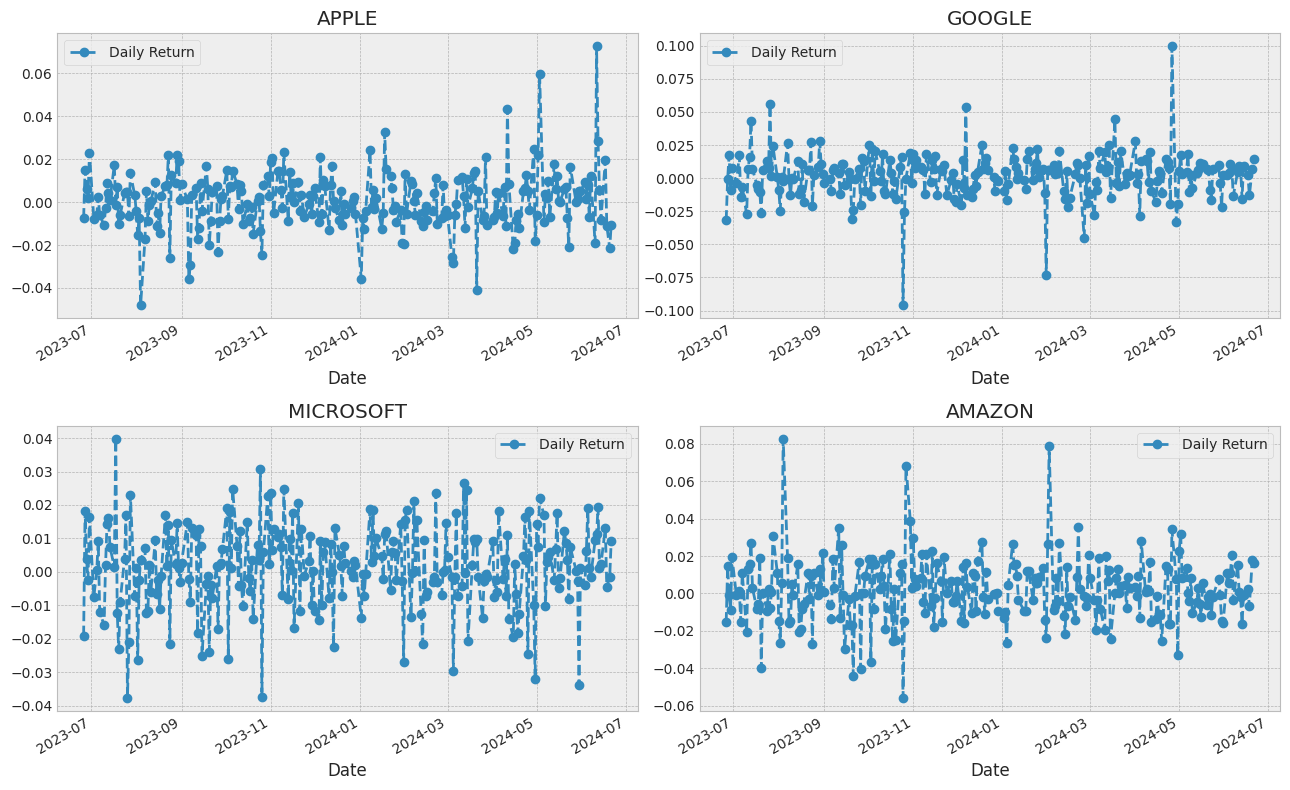

In [23]:
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(13)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

*Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure*.

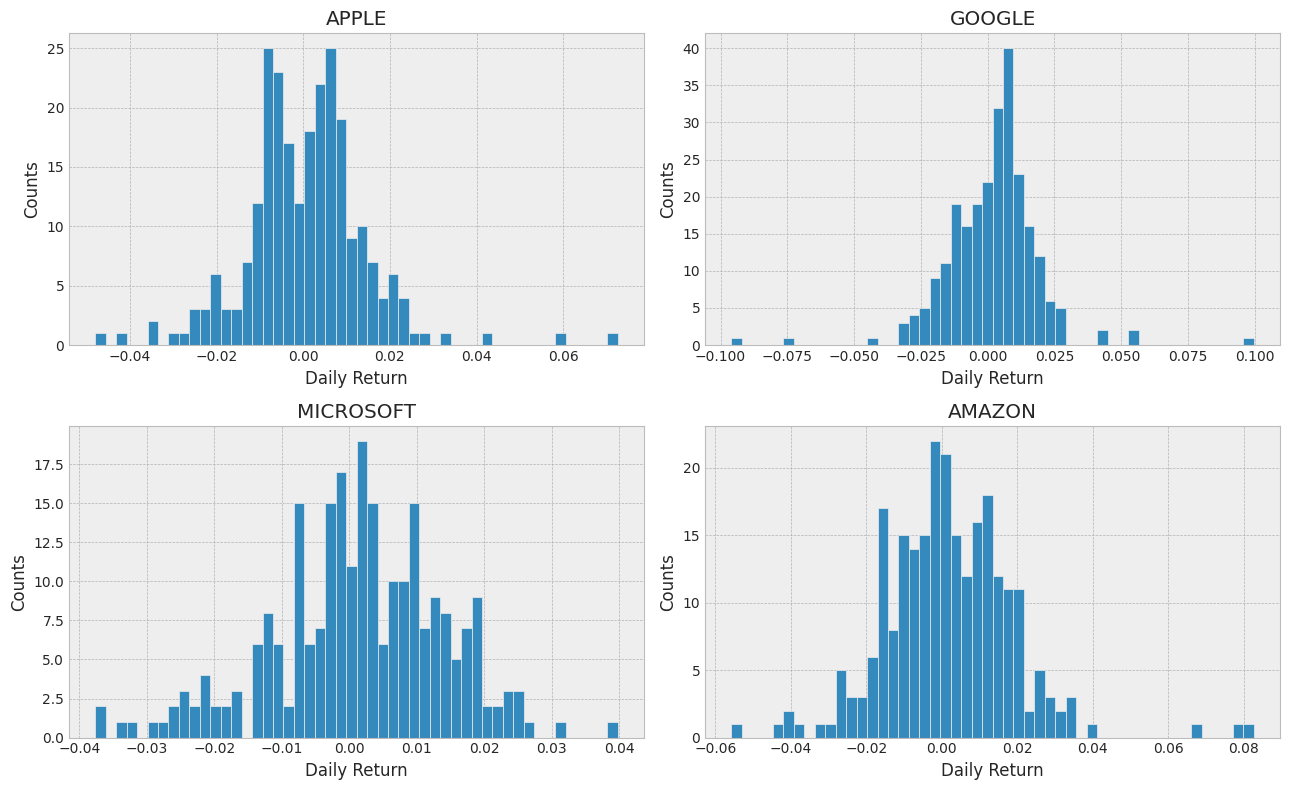

In [25]:
plt.figure(figsize=(13, 8))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

*Analyzing how much Apple, Google, Microsoft, and Amazon's stock prices change each day shows us their risk levels. The histograms and graphs we made reveal how often their daily returns go up or down. Stocks with wider graphs move more from day to day, which means they're riskier. Narrower graphs mean the stock's price doesn't change as much each day, which is safer. This helps investors decide which stocks might fit their goals and how much risk they're comfortable with in their investments.*



---



### 4. What was the correlation between different stocks closing prices?

*Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].*

*Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.*

In [47]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-06-23,NaN,NaN,NaN,NaN
2023-06-26,-0.007553,-0.015464,-0.031946,-0.019163
2023-06-27,0.015059,0.014529,-0.000672,0.018168
2023-06-28,0.006328,-0.001084,0.017394,0.003826
2023-06-29,0.001797,-0.008834,-0.008837,-0.002382


*Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.*


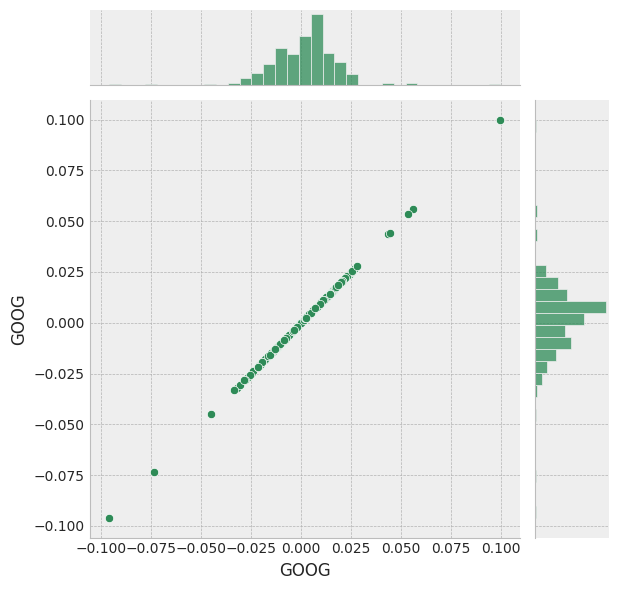

In [48]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

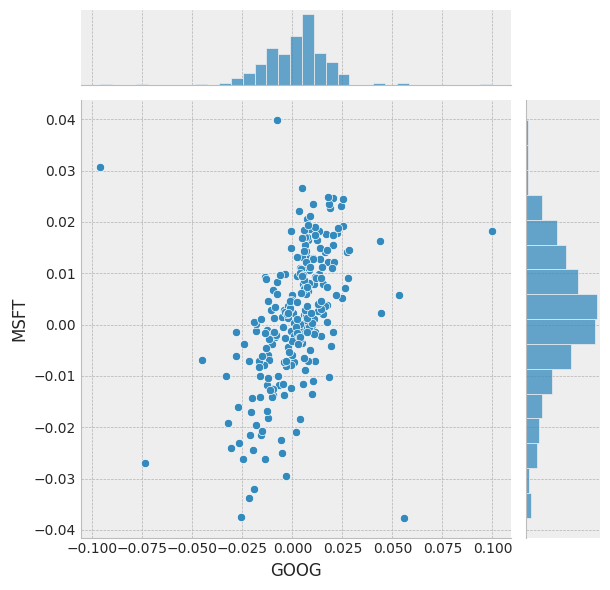

In [49]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

*The sns.jointplot() function in Seaborn is used to visualize the relationship between daily returns of pairs of tech stocks through a scatter plot with accompanying histograms. Each scatter plot represents how the daily returns of two stocks correlate: a clear, upward-sloping pattern indicates strong positive correlation, where higher returns for one stock tend to correspond with higher returns for the other. The histograms on the axes illustrate the distribution and frequency of daily returns for each stock individually. This analysis helps investors identify which stocks move in tandem, aiding in portfolio diversification and risk management by highlighting potential overlaps in stock performance.*

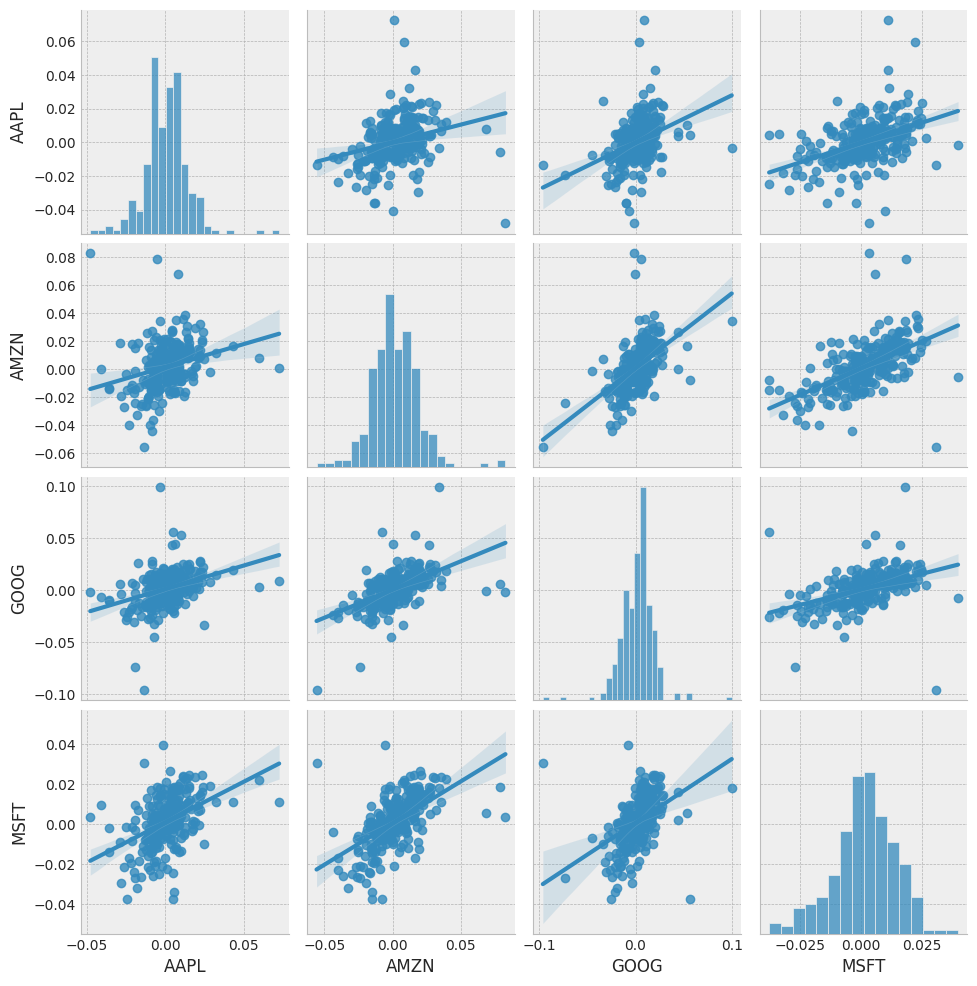

In [50]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

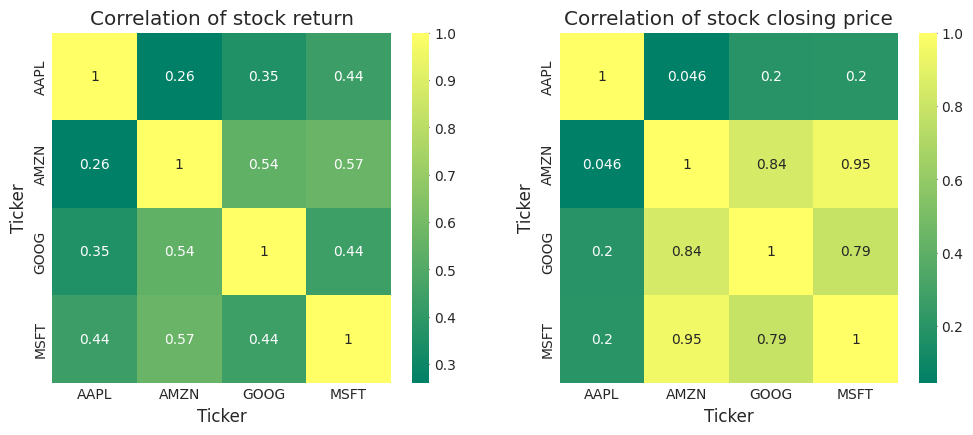

In [54]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

*Based on both numerical and visual analysis, it's evident that Microsoft and Amazon exhibit the strongest correlation in daily stock returns among the analyzed technology companies. This finding underscores a consistent movement in their stock prices relative to each other over the observed period. Moreover, the overall positive correlation among all technology companies further highlights their tendency to move in sync, albeit to varying degrees. Understanding these correlations is crucial for portfolio diversification strategies and risk management within the technology sector, enabling investors to navigate market fluctuations more effectively.*



---



### 5. How much value do we put at risk by investing in a particular stock?

*There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.*

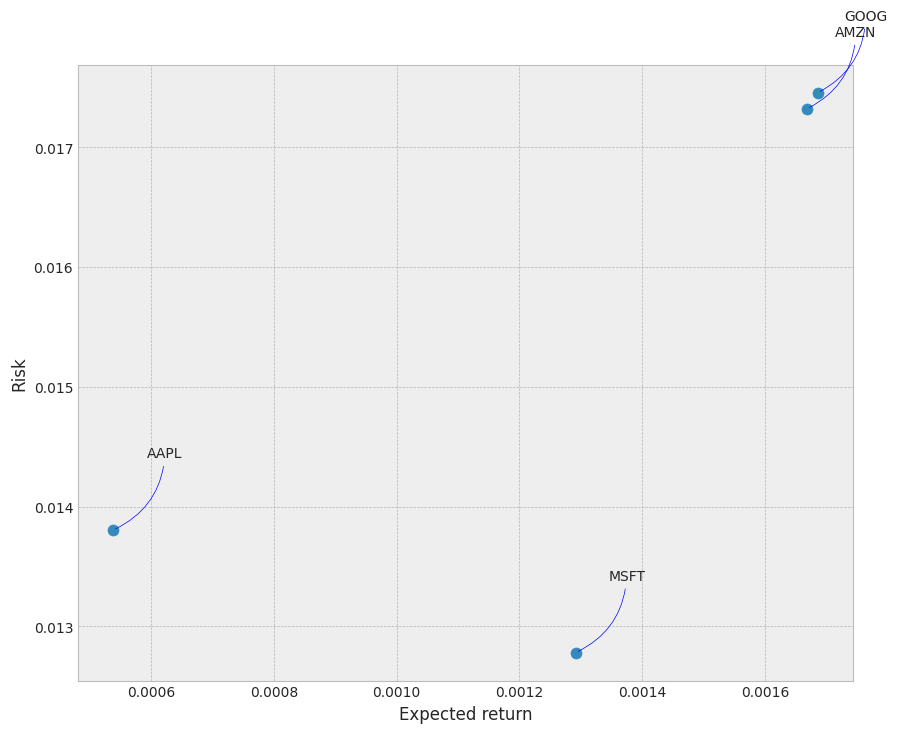

In [58]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

*In analyzing the risk associated with investing in various tech stocks based on their daily percentage returns, we utilized a scatter plot to juxtapose expected returns against the standard deviation of returns. From the plot, it is evident that each stock exhibits a unique risk-return profile: stocks positioned higher on the plot in terms of risk (standard deviation) relative to their expected returns may offer higher potential returns but with increased volatility. Conversely, stocks positioned lower on the risk axis may provide steadier returns but at the cost of lower potential gains. This visual representation allows investors to assess and compare risk levels across different tech stocks, facilitating informed decision-making in portfolio management and risk mitigation strategies.*

##**1.4 Summary**
**In this notebook, you discovered and explored stock data.**

Specifically, we Analyse:

*   How to load stock market data from the YAHOO Finance website using yfinance.
*   How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
*   How to measure the correlation between stocks.
*   How to measure the risk of investing in a particular stock.






